<a href="https://colab.research.google.com/github/HamzahSiddiquipvt/YesBank-ClosingPrice-HamzaSiddiqui/blob/main/AB_YesBank_Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

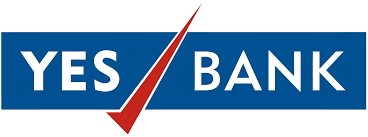

# **Project Name**    - YES Bank Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 - Hamza Siddiqui**


# **Project Summary -**

Yes Bank is a banking company that was founded in 2004 that offers a wide
range of differentiated products for its corporate and retail customers through
retail banking and asset management services.

It is also a publically traded company. That provides an opportunity for anyone to invest in Yes bank and become a shareholder. But at the same time, it means that the valuation of the company is now in the hands of investors and speculators as share prices are often heavily impacted by public opinion.

I have used yes bank stock price data set. This dataset contains 5
different features that can be used for predicting close price prediction
using machine learning. I have aimed to build the most efficient machine learning regression model for closing price prediction.

# **GitHub Link -**

https://github.com/HamzahSiddiquipvt/YesBank-ClosingPrice-HamzaSiddiqui.git

# **Problem Statement**


A well-known bank in the Indian financial industry,Yes Bank, has been in the headlines since 2018. Due to the fraud case involving its founder, Rana Kapoor, it was intriguing to observe how it has affected the company's stock prices and whether Time series models or other prediction models could adequately account for such circumstances. Since the bank's foundation, this dataset has included closing, starting, highest, and lowest stock values for each month.My key goal is to predict the stock's monthly closing price given the other independent values.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***





### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (r2_score,mean_squared_error,mean_absolute_percentage_error, mean_absolute_error)


import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset

# mount drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

### Dataset First View

In [ ]:
# Dataset First Look
try:
  df_Master = pd.read_csv("/content/drive/MyDrive/data_YesBank_StockPrices.csv")
  df_Master.head()                                                                #Shows first 5 rows
except:
  print("Error loading dataset")
# We can see from the dataframe, all the columns we have contain numerical data. There is no categorical data present.                                                                           # displays first five instances of the dataframe.

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print('\n', f'The number of rows dataset is : {df_Master.shape[0] }')
print('\n', f'The number of columns of the dataset is : {df_Master.shape[1] }')
print('\n', f'The dimension of the dataset is : {df_Master.shape }')
                                                                           #To get number of rows and columns in the dataset

### Dataset Information

In [ ]:
# Dataset Info
df_Master.info()


Null Values

In [ ]:
df_Master.isna().sum()                                                          #No null values found

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

dups = df_Master.pivot_table(index = ['Open','High','Low','Close'], aggfunc ='size')
print(dups)                                                                     #No duplicates found

### What did you know about your dataset?

After loading the data, I observed the
dataset by checking a few of the first and last rows. There are 185 rows and 5
features columns in our dataset.

Lets understand the features present in our dataset.

• Date: It denotes date of investment done (in our case we have
month and year).

• Open: Open means the price at which a stock started trading
when the opening bell rang.

• High: High refer to the maximum prices in a given time
period.

• Low: Low refer to the minimum prices in a given time
period.

• Close: Close refers to the price of an individual stock at the
end of the considered time period.
Exploratory Data Analysis:-

Also,

The Given Date in data is of Month-year format (mmm-yy) and has to be  converted to
proper date of YYYY-MM-DD and given date column has dtype as object
converting it into date time format.

Null values Treatment:
Our dataset does not contain null values which tend to affect
our accuracy. If we had null values, we could drop them or
imput them with mean or median depending on the situation.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns....
#Displaying all columns in the dataset
df_Master.columns


In [ ]:
# Dataset Describe

df_Master.describe()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df_Master['Date']

# converting the format of date
from datetime import datetime
df_Master['Date'] = pd.to_datetime(df_Master['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))     # this converts date to a yyyy-mm-dd

df_Master.set_index('Date', inplace=True)                                                                # setting Date column as index.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart (1 - 4): Checking for outliers using Box Plot

In [ ]:
x = 0                                                                            #to keep track of chart number
colorscheme=['aqua','powderblue','teal','lightslategrey','white']
for column in df_Master.columns:
  plt.figure(figsize=(3,3))
  sns.boxplot(df_Master[column], color = colorscheme[x])
  plt.xlabel(column)
  x=x+1
  plt.title("Box Plot : " + str(x) , fontsize =8)
  plt.show()
  print()


##### 1. Why did you pick the specific chart?

I picked box plots to check all features for presence of outliers.Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). This type of plot is used to easily detect outliers.

##### 2. What is/are the insight(s) found from the chart?

As we can see there are some outliers present in our data. We will need to deal with these before proceeding to modelling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight will help us deal with outliers appropriately. Presence of outliers affects the accuracy of a linear regression.

**Chart (5-9) :Univariate Analysis**

In [ ]:
x = 5                                                                           #Keeps track of chart number
colorscheme=['maroon','orange','green','brown','white']

for col in df_Master.columns:
  if str(col) != "Date":
    plt.figure(figsize=(4,3))
    sns.distplot(df_Master[str(col)], color = colorscheme[x-5])                 #Using index of the colorscheme
    x=x+1
    plt.title("Chart: " + str(x) +" -  "+ str(col) + ' Value Data Distribution')
    plt.xlabel(str(col) +' Price')
    plt.axvline(df_Master[str(col)].mean(), color='maroon', linestyle='dashed', linewidth=1)  #Plotting mean value
    plt.axvline(df_Master[str(col)].median(), color='black', linestyle='dashed', linewidth=1) #Plotting median value
    plt.show()
    print()

x=9
plt.plot(df_Master['Close'])
plt.title("Chart: " + str(x) +" - Closing value over time")
plt.xlabel('Closing Price')
plt.show()


##### 1. Why did you pick the specific chart?

It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that *these distributions are positively skewed*. The mean and median are at significant distance from each other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the gained insight we understand the we need to transform them into something close to a Normal Distribution as our models give optimal results that way.

#### Chart (9-11) Bivariate Analysis

In [ ]:
colorscheme=['blue','purple','teal','lightslategrey','white']
x=9                                                                             #Keeps track of chart number
for col in df_Master.columns[:-1]:
  if(str(col)!= "Date"):
    fig = plt.figure(figsize=(7,5))
    ax = fig.gca()
    plt.scatter(df_Master[str(col)], df_Master['Close'],color = colorscheme[x-9]) #Plotting each feature vs closing value to check for linearity
    x=x+1
    plt.title("Chart: " + str(x))
    plt.xlabel(str(col))
    plt.ylabel('Close')
    ax.set_title(f'{str(col)} vs Close')


    z = np.polyfit(df_Master[col], df_Master['Close'], 1)                       #Numpy polyfit() is a function that is used to fit the data within a polynomial function.
    y_hat = np.poly1d(z)(df_Master[col])

    plt.plot(df_Master[col], y_hat, "red", lw=1)



##### 1. Why did you pick the specific chart?

A scatter plot uses dots to represent values for two different numeric variables. Scatter plots are used to observe relationships between variables.Hence scatter plot was the best choice to establish a relationship between the independent and dependent variables.

##### 2. What is/are the insight(s) found from the chart?

All independent variables share a linear relationship with the dependent variable 'Close'. We also understand the presence of outliers from the graph

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can infer that 'Close' value is directly dependent on the opening,highest and lowest values.

#### Chart 12: Multivariate Analysis

In [ ]:
plt.title('Correlation Heatmap')
cor = sns.heatmap(df_Master.corr(),annot=True)                       #Heat map to check for correlation between all features of the dataset



##### 1. Why did you pick the specific chart?

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix.

##### 2. What is/are the insight(s) found from the chart?

From the above heatmap we understand that the independent variables are highly correlated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained here will help us deal with multicollinearity. Multicollinearity does not effect the model performance but effects the model predictability.

#### Chart 13 - 16 (Log Transformation)

In [ ]:
# Using log transformation on these features using np.log().
colorscheme=['blue','purple','teal','lightslategrey','white']
x=13
for col in df_Master.columns:
  plt.figure(figsize=(5,3))
  sns.distplot(np.log10(df_Master[col]), color= colorscheme[x-13])              #Applying log10 on each column
  x=x+1
  plt.title("Chart " + str(x)  )
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  print()

  # Plotting the mean and the median.
  plt.axvline(np.log10(df_Master[col]).mean(),color='red',linewidth=2)          #Plotting mean
  plt.axvline(np.log10(df_Master[col]).median(),color='yellow',linewidth=1.5)   #Plotting median
  plt.show()

##### 1. Why did you pick the specific chart?

A histogram is useful when the data is numerical. We wanted to see the shape of the data's distribution and determine whether the output of a process is distributed approximately normally.

##### 2. What is/are the insight(s) found from the chart?

From univariate distribution we realised that our data was positively skewed.
So we do a log transform on it and plot it as seen in the right chart. This makes it approximate normal distribution and is optimal for our model’s performance. Now our mean and median are nearly equal.

#### Chart 16-19 (Checking for outliers with log transformed data)

In [ ]:
x = 16
for col in df_Master.columns:
  plt.figure(figsize=(3,3))
  sns.boxplot(np.log10(df_Master[col]), color ='salmon')                                      #Converting column values to their log values
  plt.title("Chart :"+str(x))
  x=x+1
  plt.xlabel(col, fontsize=8)
  plt.show()





##### 1. Why did you pick the specific chart?

I picked box plots to check all features for presence of outliers.Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). This type of plot is used to easily detect outliers.

##### 2. What is/are the insight(s) found from the chart?

The above plots show that on log transformation , the outliers have been completely eliminated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Removal of outliers completely in a small data set may affect our prediction negatively. Hence, we shall not apply the log transformation.

#### Dealing with multicollinearity

In [ ]:
# Using VIF(Variation Inflation Factor) to see the correlation between independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_Master.columns[:-1]                                      #Excluding the dependent column

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_Master.values, i)
                          for i in range(len(df_Master.columns[:-1]))]

print(vif_data)

#### Feature Engineering

In [ ]:
#Since the features are highly correlated and the VIF is quite high for all of them, We can treat them as a single feature and use their mean to reach to our desired conclusion.

# Creating a new feature which would be the mean of all the independent features
df_Master['featuredColumn'] = df_Master[['Open', 'High', 'Low']].mean(axis=1).round(4)
df_Master.head()


#### Chart 20: FeaturedColumn vs Closing Value

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
plt.scatter(df_Master['featuredColumn'], df_Master['Close'])
plt.xlabel('featuredColumn')
plt.ylabel('Closing Value')
plt.title('featuredColumn vs Close')
z = np.polyfit(df_Master['featuredColumn'], df_Master['Close'], 1)
y_hat = np.poly1d(z)(df_Master['featuredColumn'])                                 #Plotting fit line
plt.plot(df_Master['featuredColumn'], y_hat, "green", lw=1)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

The dependent variable 'Close' follows a linear relationship with the new feature engineered column which is an aggregate of all the independent columns

#### Train Test Split

In [ ]:
#Using 80% for training and 20% for testing

y = y = df_Master['Close'].values
x = df_Master.dropna().drop(['Close','Open','High','Low'], axis=1)              #Considering only the aggregate of the independent columns

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


#### Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


#Since there is only one feature we are dealing with, this may be skipped

## ***5. ML Model Implementation***

### ML Model 1: Linear Regression

In [ ]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)                                                   #Training our model

LinearRegression()

# make predictions
lr_y_pred = model_lr.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print("***********************************************************************************************")

regr_mae = round(mean_absolute_error(y_test, lr_y_pred),5)
print("The Mean Absolute Error of our Model is {}".format(regr_mae))


regr_mse  = round(mean_squared_error(y_test,lr_y_pred),5)
print("Mean squared Error :" , regr_mse)

regr_rmse = round(np.sqrt(regr_mse),5)
print("The Root Mean Absolute Error of our Model is {}".format(regr_rmse))

regr_r2 = round(r2_score(y_test, lr_y_pred),5)
print("The R2 of our model is {}".format(regr_r2))


regr_adj_r2 = round(1-(1-r2_score(y_test,lr_y_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),5)
print(f"Adjusted R2 score : {regr_adj_r2}")

regr_mape = round(mean_absolute_percentage_error(lr_y_pred, y_test),5)
print('mean absolute percentage error: {}\n\n\n'.format(regr_mape))

print("***********************************************************************************************")


#Plotting predicted values vs the actual test data

plt.figure(figsize=(12,7))
plt.plot(lr_y_pred, color = "blue")
plt.plot(np.array(y_test) ,color = "red")
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

###ML Model 2: Lasso Regression with Grid Search CV

In [ ]:
# Initializing the model with some base values.
from sklearn.linear_model import Lasso

lasso  = Lasso(alpha=0.001 , max_iter= 3000)

# Fitting the model on our training data.
lasso.fit(x_train, y_train)

# Printing the intercept and coefficients.
lasso.intercept_
lasso.coef_

# Cross validation. optimizing our model by finding the best value of our hyperparameter.
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.005,0.006,0.007,0.01,0.015,0.02,1e-1,1,5,10,20,30,40,45,50]}  # list of parameters.

lasso_regressor = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=5000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.005, 0.006, 0.007, 0.01, 0.015,
                                   0.02, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]},
             scoring='neg_mean_squared_error')

# getting the best parameter
lasso_regressor.best_params_          # after several iterations and trials, we get this value as best parameter value.

{'alpha': 1e-05}

# getting the best score
print(lasso_regressor.best_score_)

# Predicting on the test dataset.
y_pred_lasso = lasso_regressor.predict(x_test)
print(y_pred_lasso)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print("***********************************************************************************************")

lasso_mae_score = round(mean_absolute_error(y_test, y_pred_lasso),5)
print("The Mean Absolute Error of our Model is {}".format(lasso_mae_score))

lasso_mse_score  = round(mean_squared_error(y_test,y_pred_lasso),5)
print("Mean squared Error :" , lasso_mse_score)

lasso_rmse_score = round(np.sqrt(lasso_mse_score),5)
print("The Root Mean Absolute Error of our Model is {}".format(lasso_rmse_score))

lasso_r2score = round(r2_score(y_test, y_pred_lasso),5)
print("The R2 of our model is {}".format(lasso_r2score))


lasso_adj_r2 = round(1-(1-r2_score(y_test,y_pred_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),5)

lasso_mape = round(mean_absolute_percentage_error(y_pred_lasso, y_test),5)
print('mean absolute percentage error: {}\n\n\n'.format(lasso_mape))
print("***********************************************************************************************")



#Plotting predicted values vs the actual test data

plt.figure(figsize=(12,7))
plt.plot(y_pred_lasso, color = "blue")
plt.plot(np.array(y_test) ,color = "red")
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Lasso regression")
plt.show()



###ML Model 3: Ridge Regression with Grid search CV

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()         # iitializing the model

# initiating the parameter grid for alpha (regularization strength).
ridge_param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}

# cross validation.
ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

# finding the best parameter value (for alpha)
ridge_regressor.best_params_

{'alpha': 0.01}

# getting the best score for optimal value of alpha.
ridge_regressor.best_score_

# predicting on the test dataset now.
y_pred_ridge = ridge_regressor.predict(x_test)



####Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# evaluating performance.
print("***********************************************************************************************")

MAE_ridge = round(mean_absolute_error(y_test,y_pred_ridge),5)
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = round(mean_squared_error(y_test,y_pred_ridge),5)
print("Mean squared Error :" , MSE_ridge)

RMSE_ridge = round(np.sqrt(MSE_ridge),5)
print("Root Mean squared Error :" ,RMSE_ridge)

R2_ridge = round(r2_score(y_test,y_pred_ridge),5)
print("R2 score :" ,R2_ridge)

Adjusted_R2_ridge = round(1-(1-r2_score(y_test, y_pred_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),5)

MAPE_ridge = round(mean_absolute_percentage_error(y_pred_ridge, y_test),5)
print('mean absolute percentage error: {}\n\n\n'.format(MAPE_ridge))
print("***********************************************************************************************")


#Plotting predicted values vs the actual test data

plt.figure(figsize=(12,7))
plt.plot(y_pred_ridge, color = "purple")
plt.plot(np.array(y_test) ,color = "red")
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Ridge Regression")
plt.show()

### Model 4: Elastic net Regression

In [ ]:
# importing and initializing Elastic-Net Regression.
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=0.001, l1_ratio=0.5)

# initializing parameter grid.
elastic_net_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

# cross-validation.
elasticnet_regressor = GridSearchCV(elasticnet_model, elastic_net_param_grid, scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(x_train, y_train)

# finding the best parameter
elasticnet_regressor.best_params_
pred_y_elNet = elasticnet_regressor.predict(x_test)


####Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# evaluate predictions
print("***********************************************************************************************")

MAE_en = round(mean_absolute_error(y_test,pred_y_elNet),5)
print(f"Mean Absolute Error : {MAE_en}")

MSE_en= round(mean_squared_error(y_test,pred_y_elNet),5)
print("Mean squared Error :" , MSE_en)

RMSE_en = round(np.sqrt(MSE_en),5)
print("Root Mean squared Error :" ,RMSE_en)

R2_en = round(r2_score(y_test,pred_y_elNet),5)
print("R2 score :" ,R2_en)

Adjusted_R2_en = round(1-(1-r2_score(y_test, pred_y_elNet))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),5)
print("Adjusted R2 score: ", Adjusted_R2_en)

MAPE_en = round(mean_absolute_percentage_error(pred_y_elNet, y_test),5)
print('mean absolute percentage error: {}\n\n\n'.format(MAPE_en))

print("***********************************************************************************************")


### Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# create dataframe with evaluation metrics
model_report = pd.DataFrame(data={'model':['Linear Regression','Ridge Regression','Lasso Regression','elastic net regression'], 'mae':[regr_mae,MAE_ridge,lasso_mae_score,MAE_en], 'mse':[regr_mse,MSE_ridge,lasso_mse_score,MSE_en],'rmse':[regr_rmse,RMSE_ridge,lasso_rmse_score,RMSE_en],'r2_score':[regr_r2,R2_ridge,lasso_r2score,R2_en],'Adj_r2':[regr_adj_r2,Adjusted_R2_ridge,lasso_adj_r2,Adjusted_R2_en],'MAPE':[regr_mape,MAPE_ridge,lasso_mape,MAPE_en]})
model_report


**Comparing Values**

In [ ]:
actual_pred_df = pd.DataFrame(y_test,pred_y_elNet).reset_index().rename(columns = {'index':'Actual values',0:'Elastic Net Predicted values'})
actual_pred_df.head(10)

**Plotting results of all models**

In [ ]:
# Plotting the predicted values of all the models against the true values.
plt.figure(figsize=(16,8))
plt.plot(y_test, linewidth=1,color='black')
plt.plot(lr_y_pred)
plt.plot(y_pred_lasso)
plt.plot(y_pred_ridge)
plt.plot(pred_y_elNet)
plt.legend(['linear','lasso','ridge','elastic_net'])
plt.title('Actual vs Predicted Closing Price values by various Algorithms', weight = 'bold',fontsize=16)
plt.show()


In [ ]:
#Homoscedasticity is an assumption in linear regression algorithm.
# Homoscedasticity means that the model should perform well on all the datapoints.

# Plotting the residuals(errors) against actual test data.
residuals = y_test - pred_y_elNet

plt.figure(figsize =(12,1))
plt.scatter(y_test,residuals,c='red')
plt.title('Actual Test data vs Residuals (Elastic Net)')


z = np.polyfit(y_test, residuals, 1)                       #Numpy polyfit() is a function that is used to fit the data within a polynomial function.
y_hat = np.poly1d(z)(y_test)
plt.plot(y_test, y_hat, "blue", lw=1)

plt.show()

# **Conclusion**

1) Closing stock market value for YES Bank depends on the opening value as well as the highest and lowest values through the day, Given the linear relation between dependent value 'Close' and independent values 'Open','High' and 'Low'.

2) The dataset provided was small, hence it is difficicult to conclude if the outliers were 'true outliers'.

Presence of outliers alos points towards the real world scenario where stock market prices can spike or fall overnight due to social, natural or economical factors

3) There is very high collinearity between the independent values. Multicollinearity was handled using feature engineering.

4) On fitting various models like linear regression, Lasso, Ridge and Elastic net , an accuracy of 97.5% was achieved.

5) On further modelling variations like Log transformation, introducing lags or random forest regressor, xgboost regressor and support vector regressor, there is scope to increase the accuracy.

But, it might also result in overfitting.

6)  Using data visualization on our target variable, we can clearly see the impact of 2018 fraud
case involving Rana Kapoor as the stock prices decline dramatically during that period.


7) This model is quite accurate on this test data. But, its real world applicability can only be decided based on its performance on larger data sets.


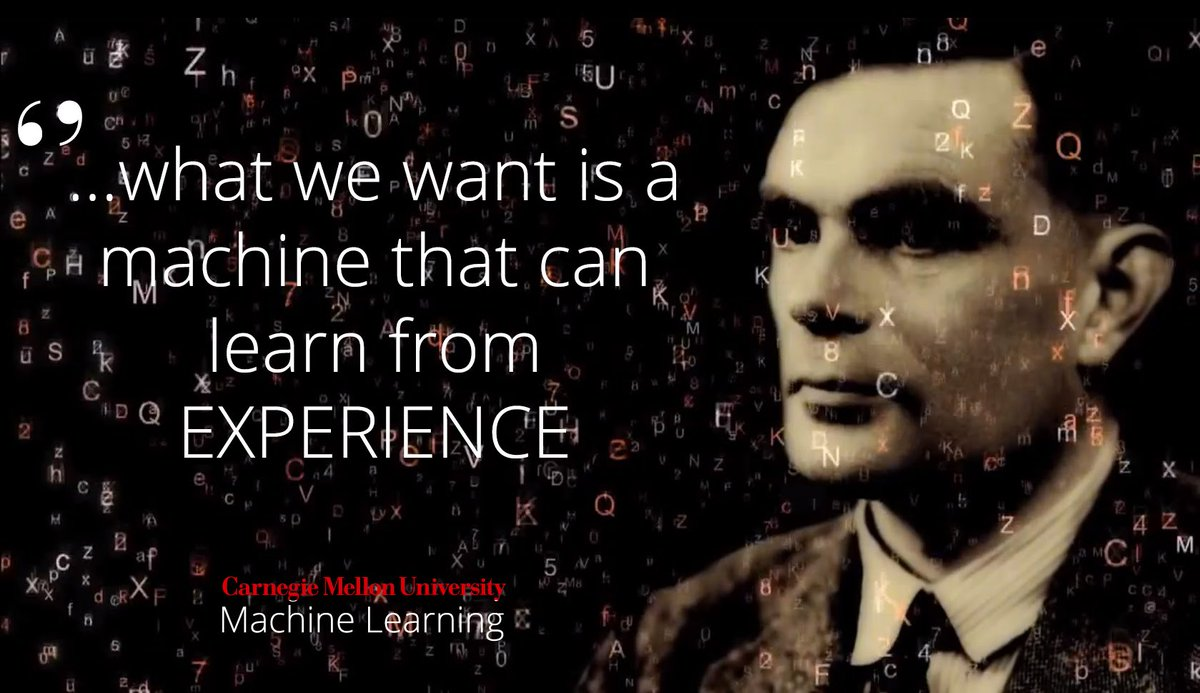